# Utilizar tu proyecto como un módulo de Python

## Descargamos el notebook:
https://static.platzi.com/media/public/uploads/1-0-jvelezmagic-full_b038c258-f03a-4940-b4ee-6945ee152ee6.ipynb.

Lo copiamos en la carpeta de notebooks. Lo abrimos en VSCode y nos fijamos que el kernel sea el que creamos anteriormente `final_project`. Como se puede observar tenemos una serie de código y funciones que realizan determinada labor.

Todos estos datos son de COVID, casos confirmados y algunos otras observaciones.

Entender que hace y como está estructurado no corresponde al curso, solo es un ejemplo de notebook.

Pero podemos tomar el [Curso para Crear tus Proyectos de Ciencia de Datos](https://platzi.com/cursos/proyectos-data-science/).


Veamos que la linea 

```py
import final_project.utils.paths as path
```

Usa el proyecto como una librería y que si vamos a la carpeta y accedemos al archivo [paths.py](final_project/final_project/utils/paths.py) obtenemos la función que usamos en clases anteriores para crear `shortcuts` con las rutas, en esencia la función se convirtió en un script y la podemos usar dentro del notebook.

Ejecutemos la importación de librerías pero antes refresquemos el kernel con la celda que contiene:

```py
%load_ext autoreload
%autoreload 2
```

Al ejecutar la celda me marca un error debido a que estoy fuera de la carpeta del proyecto. Para poder correr bien mi archivo lo replicaré dentro de la carpeta del proyecto.

# 1.0 Full Exploratory Data Analysis

Una vez descargado, puedes instalar un proyecto como módulo de Python usando el siguiente comando en la terminal:

``pip install --editable``

Para que se reinicie el kernel, cada vez que reimportes los módulos después de hacer un cambio en estos, agrega esto en la primera celda:

```sh
%load_ext autoreload
%autoreload 2
```


El hacer el autoreload te ayuda a externalizar trozos de código en archivos .py, como la creación de gráficos.      
Los notebooks son buenos para hacer exploración, pero no para producción.

## Libraries

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
path.hello()

hellooooooooo!


In [8]:
path.hello()

hellooooooooo!


## Download data

### Specify input and output files

In [9]:
covid_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

### Run download

In [10]:
!curl {covid_url} -o {covid_file}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1777k  100 1777k    0     0  4718k      0 --:--:-- --:--:-- --:--:-- 4726k


## Process data

### Read data

In [11]:
input_covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

In [12]:
covid_df = pd.read_csv(input_covid_file)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [13]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


### Process data

In [14]:
processed_df = (
    covid_df
    .select_columns(["Country/Region", "*/*/*"])
    .pivot_longer(
        index="Country/Region",
        names_to="date"
    )
    .transform_column("date", pd.to_datetime)
    .clean_names()
)

processed_df.head()

/home/dens/miniforge3/envs/final_project/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Save output data

In [15]:
output_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [16]:
processed_df.to_csv(output_covid_file, index=False)

## Explore data

### Read data

In [17]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [18]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  330327 non-null  object
 1   date            330327 non-null  object
 2   value           330327 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.6+ MB


In [19]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [20]:
sns.set_style("whitegrid")

In [21]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [22]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

/home/dens/miniforge3/envs/final_project/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.query` instead.
  return method(self._obj, *args, **kwargs)
/home/dens/miniforge3/envs/final_project/lib/python3.9/site-packages/pandas_flavor/register.py:157: DeprecationWarning: This function will be deprecated in a 1.x release. Kindly use `pd.DataFrame.query` instead.
  return method(self._obj, *args, **kwargs)


,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

In [29]:
def covid_time_series():
    sns.lineplot(
        data=some_latam_countries_df,
        x="date",
        y="value",
        hue="country_region"
    )

    plt.xticks(rotation=15)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Latam covid time series");

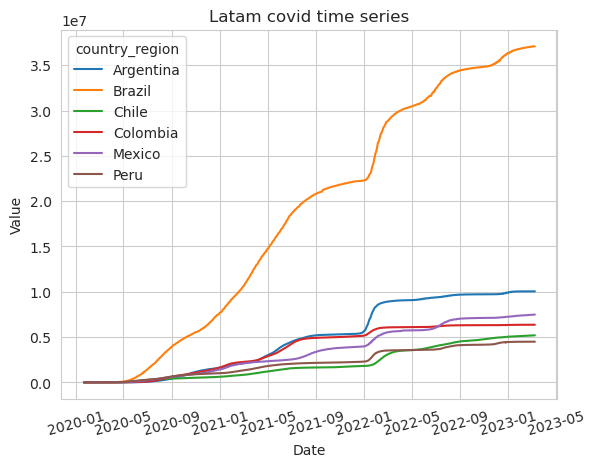

In [30]:
covid_time_series()

In [31]:
#definiendo la función en bloque de código

def covid_time_series(df):
    sns.lineplot(
        data=df,
        x="date",
        y="value",
        hue="country_region"
    )

    plt.xticks(rotation=15)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Latam covid time series");


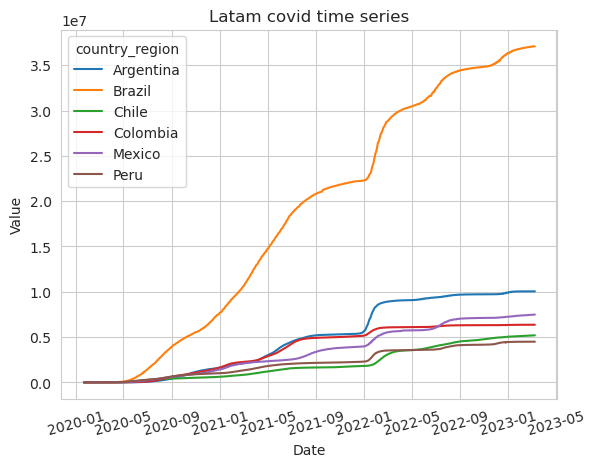

In [32]:
#probando la función en otro bloque de código
covid_time_series(some_latam_countries_df)

Matplotlib is building the font cache; this may take a moment.


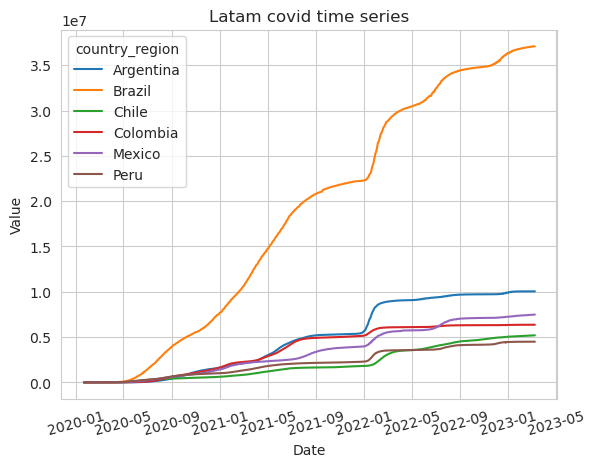

In [23]:
sns.lineplot(
    data=some_latam_countries_df,
    x="date",
    y="value",
    hue="country_region"
)

plt.xticks(rotation=15)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Latam covid time series");

### Probando la función que creamos en Visualize

In [33]:
#importando la función
import final_project.visualization.visualize as visualize 

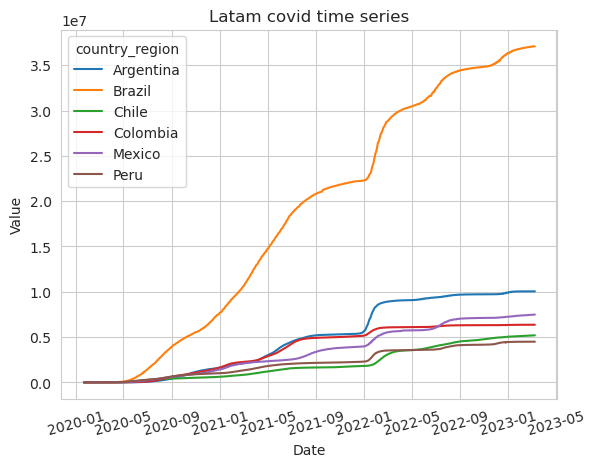

In [34]:
#probando la función en otro bloque de código
visualize.covid_time_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [24]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

/home/dens/miniforge3/envs/final_project/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


,country_region,value,color
0,US,53813184406,lightblue
1,India,29131119694,lightblue
2,Brazil,21182690594,red
3,France,16105911886,lightblue
4,Germany,13686043720,lightblue


Plot to Latam in highlighted bars.

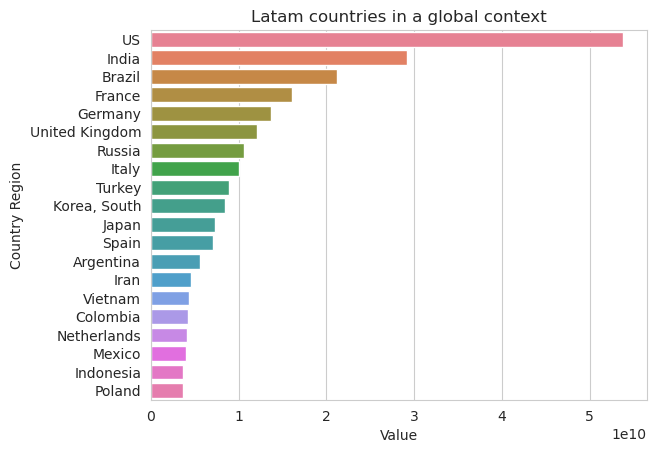

In [28]:
sns.barplot(
    data=top_countries_df,
    x="value",
    y="country_region",
    hue="country_region",
    #palette=top_countries_df.color
)

plt.xlabel("Value")
plt.ylabel("Country Region")
plt.title("Latam countries in a global context");

### Implementando la última función

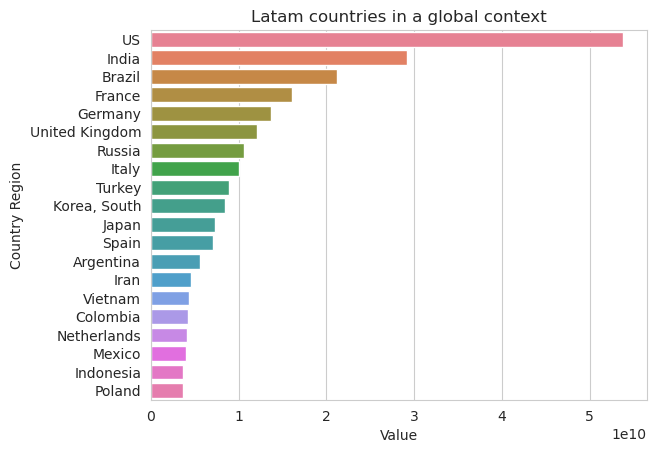

In [38]:
#Haciendo uso de mi función
visualize.latam_grafic(top_countries_df)